In [1]:
from environment import MountainCar
import numpy as np

In [183]:
model_1 = MountainCar("raw")
model_2 = MountainCar("tile")

In [190]:
episodes = 4
max_iterations = 200
epsilon = 0.05
gamma = 0.99
lr = 0.01

In [60]:
s = model_1.state

In [124]:
class Agent:
    
    def __init__(self, n_state, n_action):
        self.weights = np.zeros( (n_state, n_action) )
        self.b = 0
        
    def policy(self, s, epsilon):
        Q = np.dot(s.T,self.weights) + self.b 
        if np.random.rand(0,1) < epsilon:
            action = np.random.randint(0,3)
        else:
            action = np.argmax(Q)
        return action 
    
    def train(self, s1,s2,reward, gamma, lr):
        
        Q1 = np.dot(s1.T, self.weights) + self.b
        Q2 = np.dot(s2.T, self.weights) + self.b 
        self.weights -= lr*(Q1 - Q2)*np.repeat(s1,3)
        self.b -= lr*(Q1 - Q2)

In [191]:
def policy( W,b, s, epsilon):
    Q = np.dot(s.T,W) + b 
    if np.random.rand(0,1) < epsilon:
        action = np.random.randint(0,3)
    else:
        action = np.argmax(Q)
    return action 

In [192]:
def train(W,b,action,s1,s2,reward, gamma, lr):
    Q1 = np.dot(s1.T, W[:,action][:,None]) + b
    Q2 = reward + np.max( np.dot(s2.T, W) ) + b
    W -= lr*(Q1 - Q2)*np.repeat(s1,3,axis = 1)
    b -= lr*(Q1 - Q2)
    return W, b

In [238]:
def sparse_dot(W,x):
    product = 0.0
    for key in x.keys():
        product += x[key]*W[key]
    return product
        

def policy(W,b,s,epsilon):
    
    Q = []
    for action in [0,1,2]:
        Q.append( sparse_dot(W[:,action], s) + b)
    
    if np.random.rand(0,1) < epsilon:
        action = np.random.randint(0,3)
    else:
        action = Q.index( max(Q) )
    return action
        
def train(W,b,action,reward,s1,s2,gamma,lr):
    Q1 = sparse_dot(W[:,action], s1) + b  # value function at (s,a;W)
    
    Q2_action = []
    for action_ in [0,1,2]:
        Q2_action.append(  gamma*( sparse_dot( W[:,action_], s2) + b ) )
    Q2 = reward + max(Q2_action)    
    
    for key in s1.keys():
        W[key][action] -= lr*(Q1-Q2)*s1[key]
    
    b -= lr*(Q1-Q2)
    return W, b

In [239]:
W = np.zeros( (2,3))
b = 0
done = False

for i in range(4):
    total_reward = 0.0
    s1 = model_1.reset()
    for j in range(200):
        
        action = policy(W,b,s1,epsilon)
        s2, reward, done = model_1.step(action)
        total_reward += reward
        W, b = train(W,b,action,reward,s1,s2, gamma, lr)
        if done:
            break
        s1 = s2
    print(total_reward)
        

-200.0
-200.0
-200.0
-200.0


/Users/qianchen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  


In [240]:
W

array([[ 1.33603603e+00,  1.33999447e+00,  1.34014249e+00],
       [-6.38015017e-04, -1.02410913e-04,  1.99940683e-03]])

In [242]:
car = MountainCar('raw')
car.state_space

2

In [244]:
car = MountainCar("tile")
car.state_space

2048

In [214]:
a = np.eye(3)

In [216]:
a[1][1]

1.0

In [217]:
a = np.array([ [1,2,3],[4,5,6],[7,8,9]])

In [220]:
a[0][0]

1

In [246]:
mode = "tile"
Car = MountainCar(mode)
Car.state_space

2048

In [263]:
import matplotlib.pyplot as plt

In [274]:
content_tile = []
with open('returns_tile.out','r') as f:
    lines = f.readlines()
    for i in range(len(lines)):
        reward = float( lines[i].split()[0] )
        content_tile.append(reward )

        
content_raw = []
with open('returns_raw.out','r') as f:
    lines = f.readlines()
    for i in range(len(lines)):
        reward = float( lines[i].split()[0] )
        content_raw.append(reward )        

In [275]:
episode_tile = list( range(1,401))
episode_raw = list(range(1,2001))

In [276]:
import pandas as pd
s  = pd.Series(content_tile)
rolling_reward_tile = s.rolling(25).mean()

s  = pd.Series(content_raw)
rolling_reward_raw = s.rolling(25).mean()

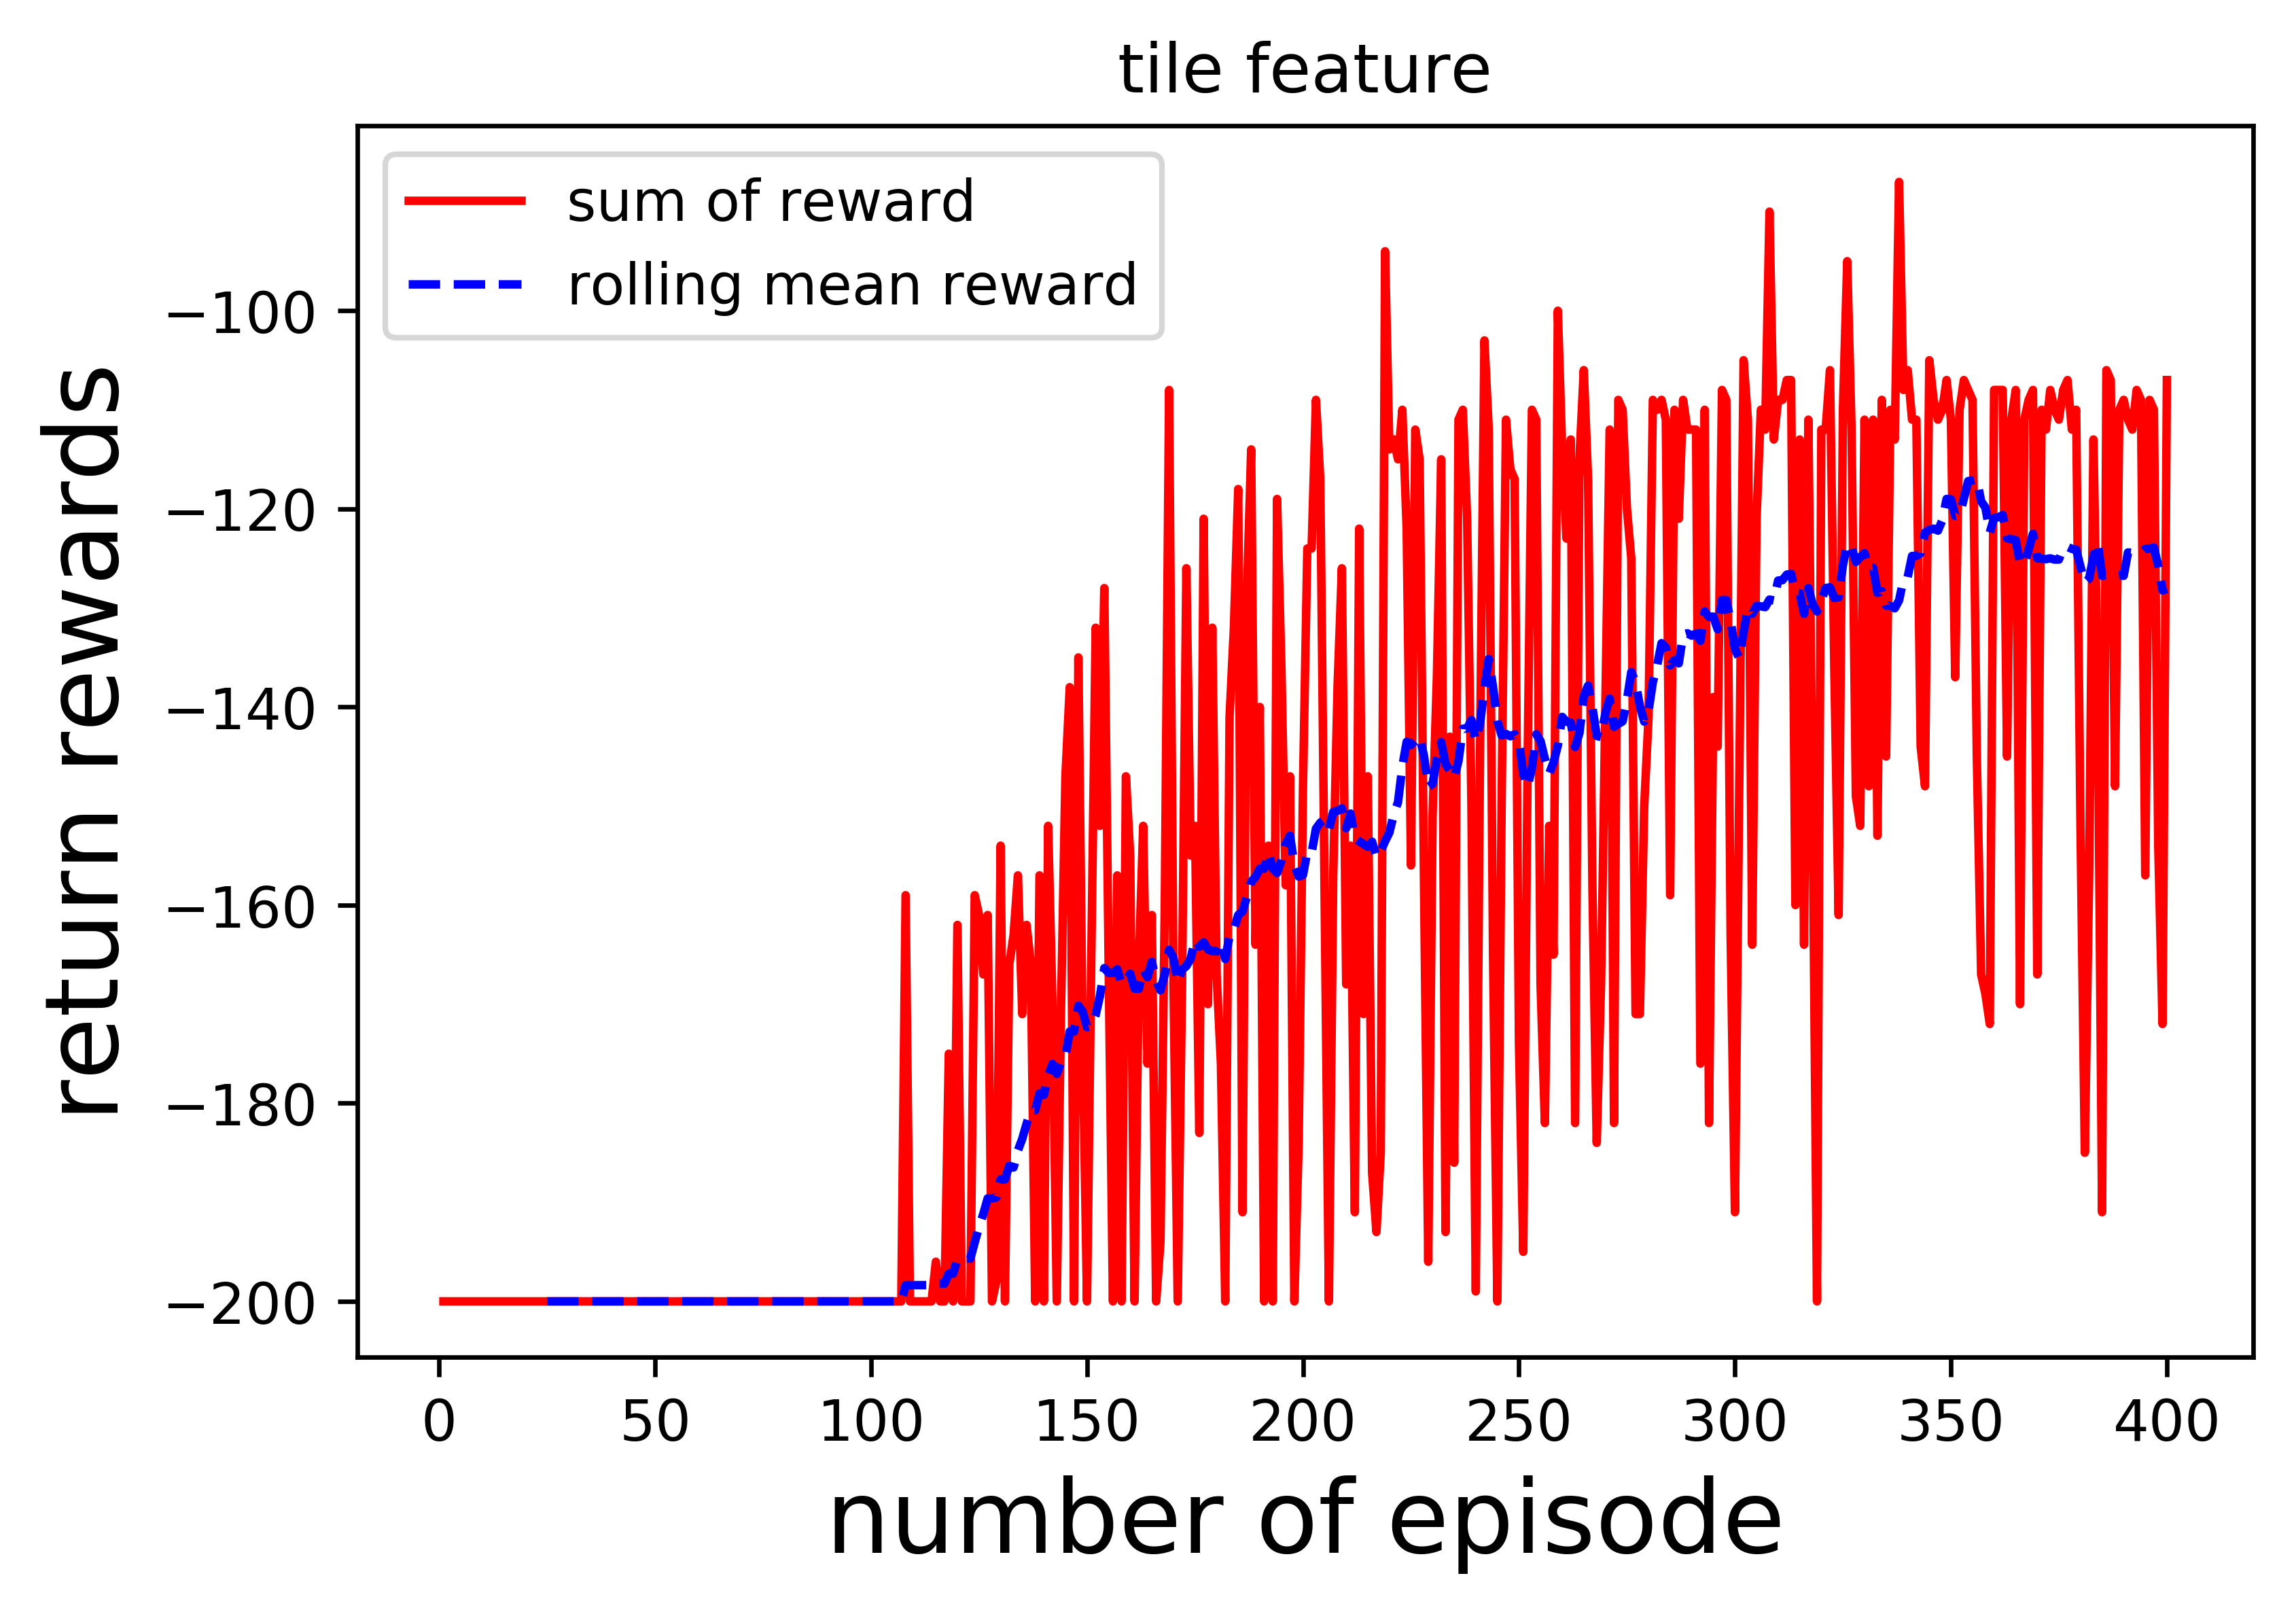

In [288]:
plt.figure( dpi = 600)
line1, = plt.plot(episode,content_tile,linestyle='-', color='r')
line2, = plt.plot(episode[24:],rolling_reward_tile[24:], linestyle = '--', color = 'b' )

plt.xlabel("number of episode",size = 18)
plt.ylabel("return rewards",size = 18)
plt.legend([line1, line2], ['sum of reward','rolling mean reward'])
plt.title("tile feature", fontsize = 12, color ='k')
plt.show()

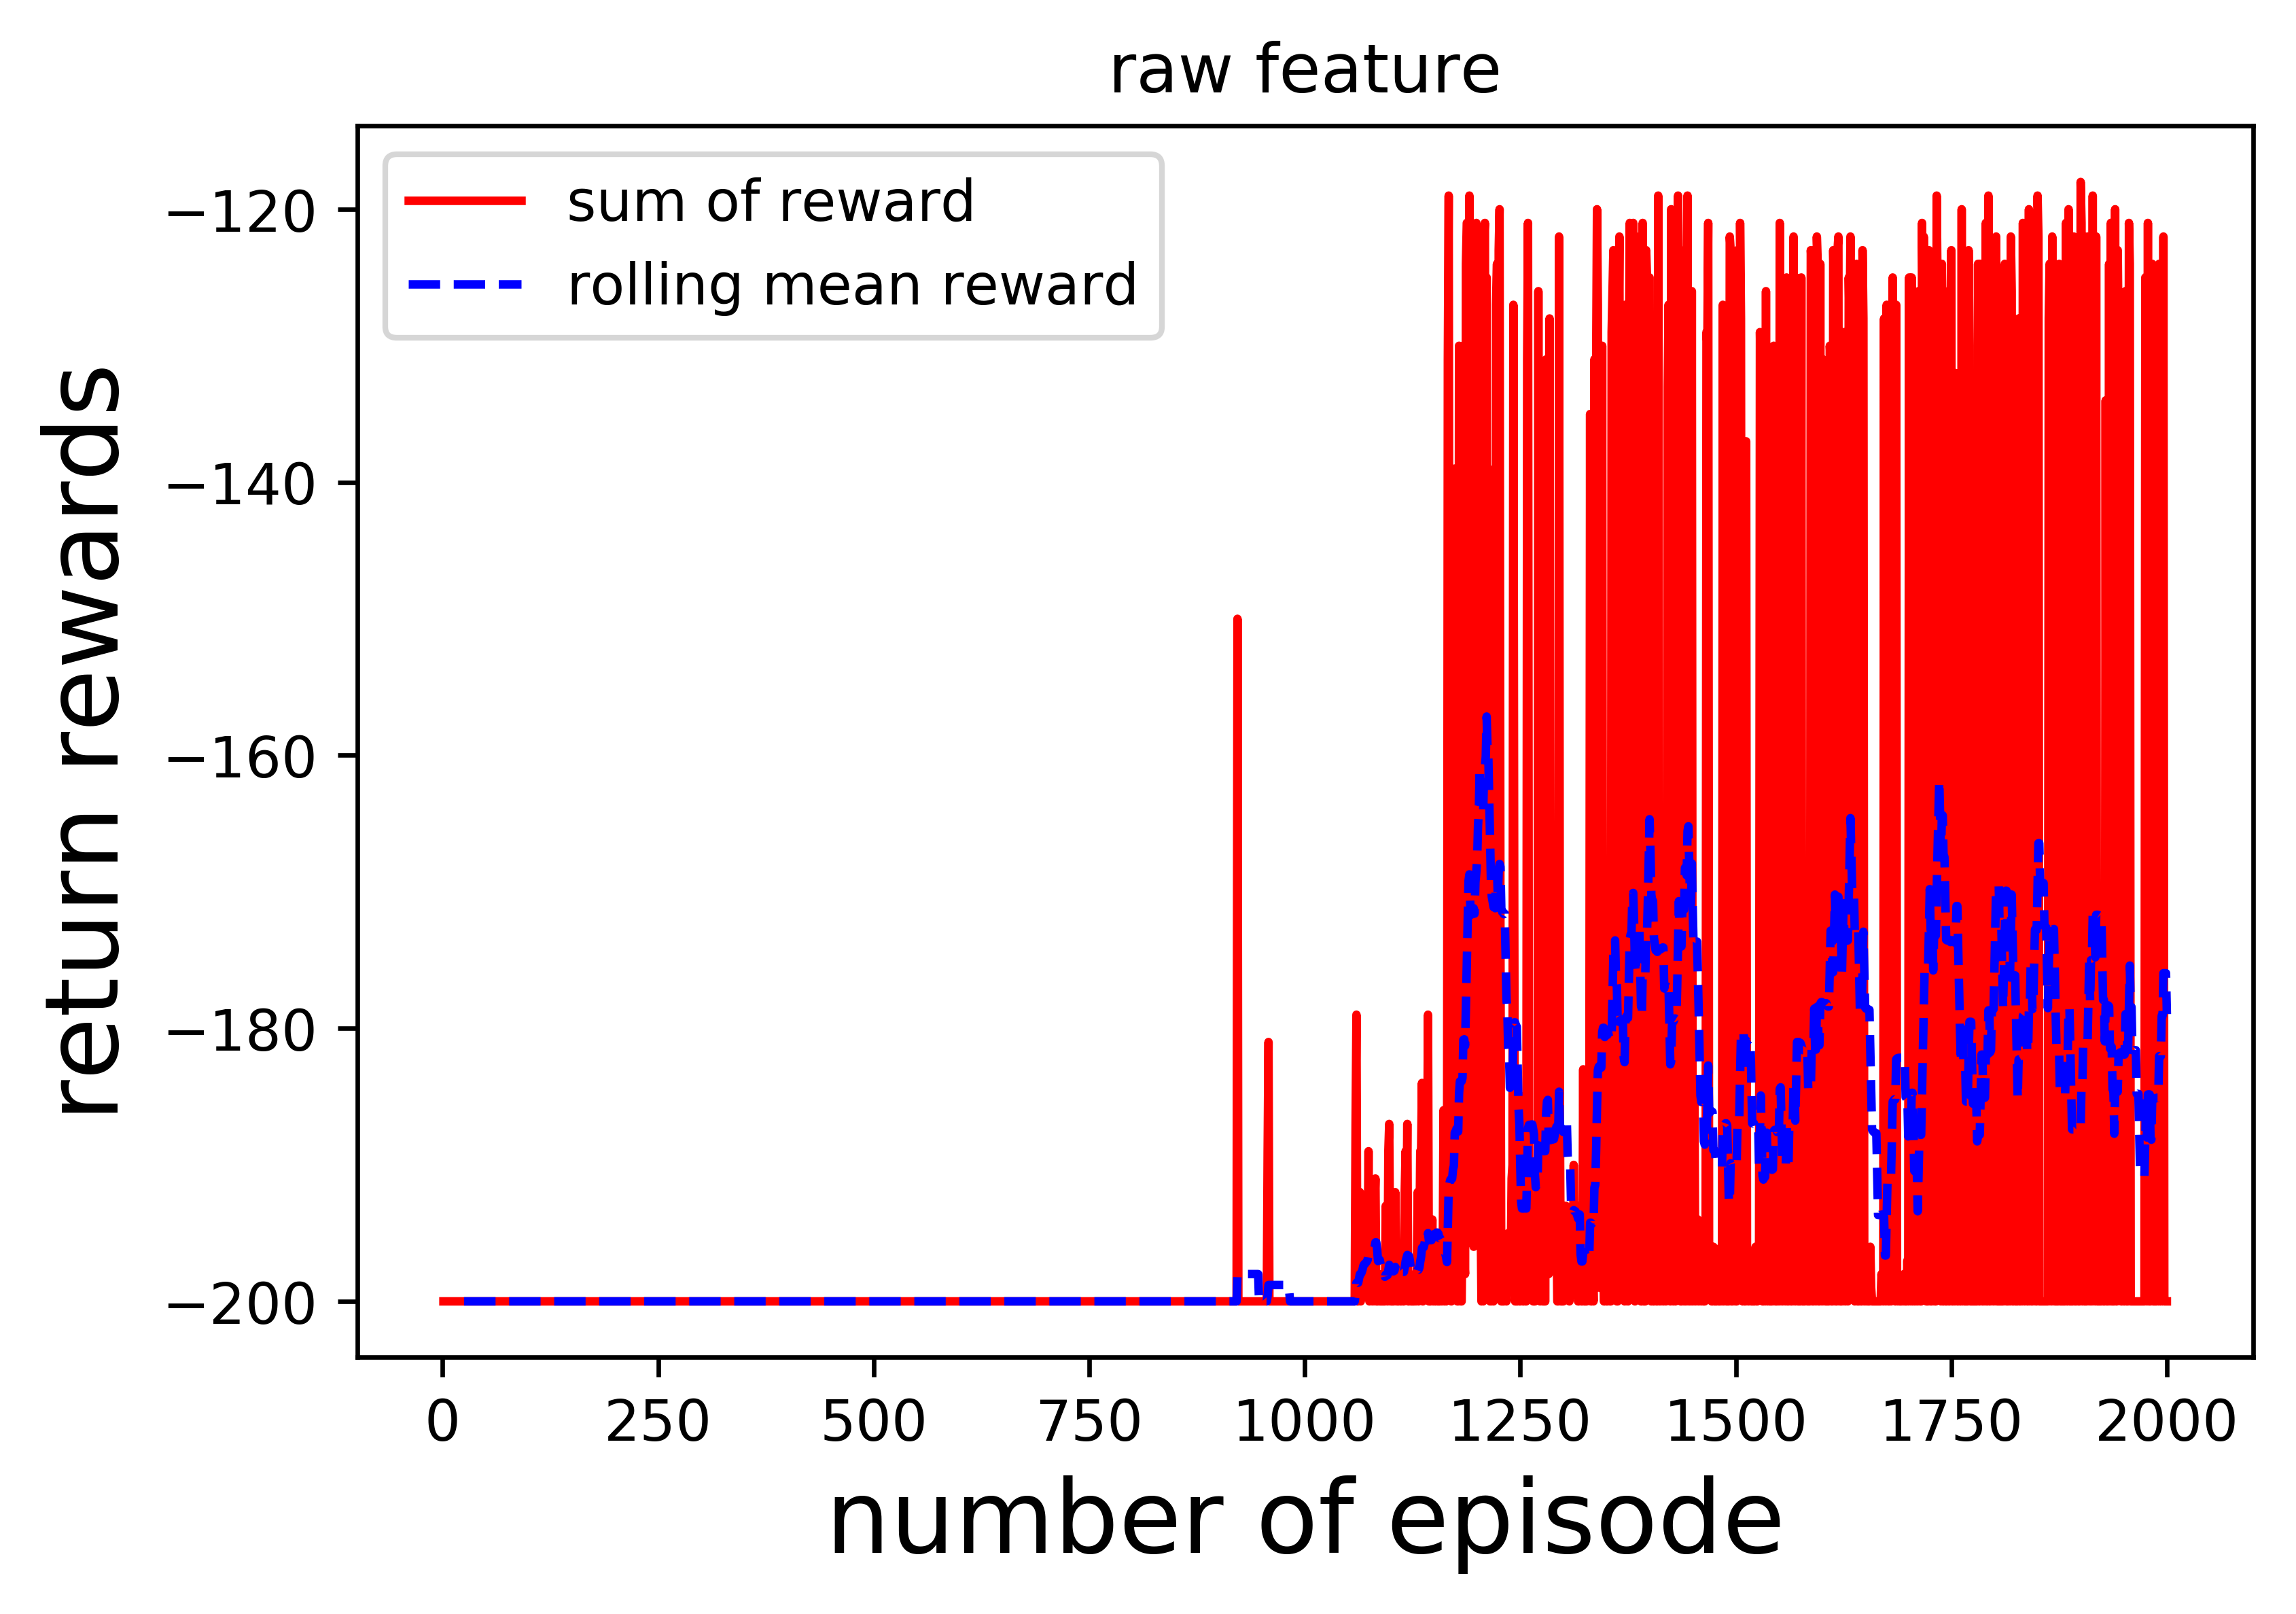

In [287]:
plt.figure( dpi = 600)
line1, = plt.plot(episode_raw,content_raw,linestyle='-', color='r')
line2, = plt.plot(episode_raw[24:],rolling_reward_raw[24:], linestyle = '--', color = 'b' )

plt.xlabel("number of episode",size = 18)
plt.ylabel("return rewards",size = 18)
plt.legend([line1, line2], ['sum of reward','rolling mean reward'])
plt.title("raw feature", fontsize = 12, color ='k')
plt.show()

In [294]:
rolling_reward_raw

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
5          NaN
6          NaN
7          NaN
8          NaN
9          NaN
10         NaN
11         NaN
12         NaN
13         NaN
14         NaN
15         NaN
16         NaN
17         NaN
18         NaN
19         NaN
20         NaN
21         NaN
22         NaN
23         NaN
24     -200.00
25     -200.00
26     -200.00
27     -200.00
28     -200.00
29     -200.00
         ...  
1970   -190.76
1971   -190.76
1972   -190.76
1973   -190.84
1974   -187.84
1975   -185.04
1976   -188.00
1977   -184.84
1978   -184.84
1979   -184.84
1980   -188.00
1981   -188.16
1982   -185.12
1983   -185.12
1984   -185.12
1985   -185.12
1986   -185.12
1987   -185.12
1988   -185.08
1989   -185.08
1990   -182.04
1991   -182.04
1992   -182.04
1993   -179.08
1994   -179.08
1995   -175.96
1996   -175.96
1997   -175.96
1998   -175.96
1999   -178.96
Length: 2000, dtype: float64